In [1]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


## Basics

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [3]:
sentences=["I love my dog","I am indian","Hot dogs are hot!","Maybe tomorrow i will see"]

In [4]:
tokenizer = Tokenizer(num_words=100,oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
# tokenizer.fit_on_sequences(sentences)
word_index=tokenizer.word_index

In [5]:
sequences= tokenizer.texts_to_sequences(sentences)
# sequences= tokenizer.sequences_to_matrix(sentences)

In [6]:
print(word_index)

{'<OOV>': 1, 'i': 2, 'hot': 3, 'love': 4, 'my': 5, 'dog': 6, 'am': 7, 'indian': 8, 'dogs': 9, 'are': 10, 'maybe': 11, 'tomorrow': 12, 'will': 13, 'see': 14}


In [7]:
print(sequences)

[[2, 4, 5, 6], [2, 7, 8], [3, 9, 10, 3], [11, 12, 2, 13, 14]]


In [8]:
test_data=["I hate penguins", "Manatee is big","Sea life is myterious","dogs are cool"]
test_seq= tokenizer.texts_to_sequences(test_data)


In [9]:
print(test_seq)

[[2, 1, 1], [1, 1, 1], [1, 1, 1, 1], [9, 10, 1]]


In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [11]:
padded=pad_sequences(sequences,maxlen=10,truncating="pre")

In [12]:
padded

array([[ 0,  0,  0,  0,  0,  0,  2,  4,  5,  6],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  7,  8],
       [ 0,  0,  0,  0,  0,  0,  3,  9, 10,  3],
       [ 0,  0,  0,  0,  0, 11, 12,  2, 13, 14]], dtype=int32)

## Training

In [206]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [207]:
import json

with open("/content/drive/MyDrive/Data/Sarcasm_Headlines_Dataset_v2.json",'r') as f:
  datastore=json.load(f)

sentences=[]
# url=[]
labels=[]
for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [208]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [209]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

In [210]:
tokenizer.fit_on_texts(training_sentences)
training_index = tokenizer.word_index

training_sequence = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequence,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [211]:
testing_sequence = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequence,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [212]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [213]:
import tensorflow as tf

In [214]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_1  (None, 16)                0         
 6 (GlobalAveragePooling1D)                                      
                                                                 
 dense_32 (Dense)            (None, 24)                408       
                                                                 
 dense_33 (Dense)            (None, 1)                 25        
                                                                 
Total params: 160433 (626.69 KB)
Trainable params: 160433 (626.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [215]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 4s - loss: 0.6544 - accuracy: 0.6309 - val_loss: 0.5290 - val_accuracy: 0.8122 - 4s/epoch - 7ms/step
Epoch 2/30
625/625 - 3s - loss: 0.4116 - accuracy: 0.8352 - val_loss: 0.3683 - val_accuracy: 0.8436 - 3s/epoch - 5ms/step
Epoch 3/30
625/625 - 2s - loss: 0.3068 - accuracy: 0.8786 - val_loss: 0.3380 - val_accuracy: 0.8543 - 2s/epoch - 4ms/step
Epoch 4/30
625/625 - 2s - loss: 0.2575 - accuracy: 0.8982 - val_loss: 0.3385 - val_accuracy: 0.8486 - 2s/epoch - 4ms/step
Epoch 5/30
625/625 - 2s - loss: 0.2228 - accuracy: 0.9141 - val_loss: 0.3376 - val_accuracy: 0.8502 - 2s/epoch - 4ms/step
Epoch 6/30
625/625 - 3s - loss: 0.1952 - accuracy: 0.9264 - val_loss: 0.3436 - val_accuracy: 0.8545 - 3s/epoch - 4ms/step
Epoch 7/30
625/625 - 4s - loss: 0.1753 - accuracy: 0.9350 - val_loss: 0.3580 - val_accuracy: 0.8506 - 4s/epoch - 6ms/step
Epoch 8/30
625/625 - 2s - loss: 0.1567 - accuracy: 0.9426 - val_loss: 0.3717 - val_accuracy: 0.8477 - 2s/epoch - 3ms/step
Epoch 9/30
625/625 - 3s 

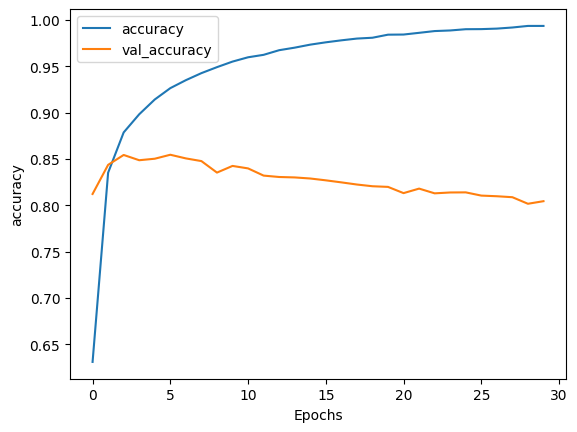

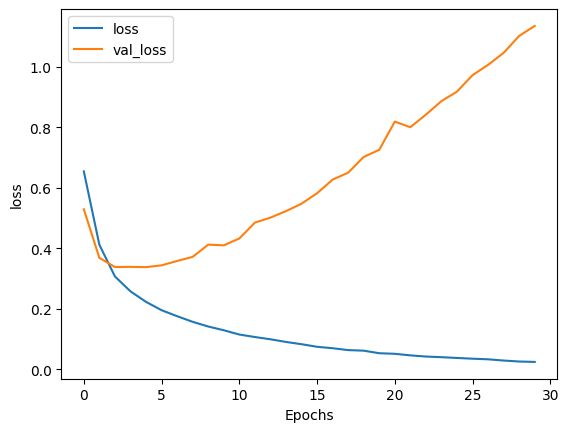

In [216]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Misc

In [222]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

<OOV> run kentucky wendy's written of travel demand ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
eat your veggies: 9 deliciously different recipes
0


In [223]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [224]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [225]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [226]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 18ms/step
[[8.9696527e-01]
 [8.3740446e-08]]
